# Exploratory Data Analysis (EDA): Telco Customer Churn

This notebook conducts an exploratory data analysis on the Telco Customer Churn dataset to examine relationships between variables and identify patterns that may predict customer churn.

**Objective:** Understand what factors influence customer churn and identify key characteristics of customers who leave vs. those who stay.


In [78]:
# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline in the notebook
%matplotlib inline

# Set default style for visualizations
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## 1. Data Loading and Initial Inspection

Load the dataset and perform initial inspection to understand its structure.


In [79]:
# Load the Telco Customer Churn dataset
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")


Dataset Shape: 7043 rows, 21 columns


In [80]:
# Display the first few rows to understand the data structure
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
# Display summary information about the dataset including data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
# Check for missing values in each column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns = ['Count', 'Percentage']
print("Missing Values Summary:")
missing[missing['Count'] > 0]


Missing Values Summary:


,Count,Percentage


In [83]:
# Display descriptive statistics for numerical columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 2. Data Cleaning and Preparation

Prepare the data for analysis by handling data type conversions and any necessary cleaning.


In [84]:
# Convert TotalCharges to numeric (it's stored as object due to empty strings)
# First, replace empty spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many null values were created
print(f"Null values in TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")


Null values in TotalCharges after conversion: 11


In [85]:
# For customers with 0 tenure, TotalCharges is likely empty - fill with MonthlyCharges
# These are new customers who haven't been charged yet
df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = df.loc[df['TotalCharges'].isnull(), 'MonthlyCharges']

print(f"Remaining null values in TotalCharges: {df['TotalCharges'].isnull().sum()}")


Remaining null values in TotalCharges: 0


In [86]:
# Create a binary numeric column for Churn for easier analysis
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify the mapping
print("Churn value counts:")
print(df['Churn'].value_counts())
print("\nChurn_Binary value counts:")
print(df['Churn_Binary'].value_counts())


Churn value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn_Binary value counts:
Churn_Binary
0    5174
1    1869
Name: count, dtype: int64


## 3. Target Variable Analysis: Churn Distribution


In [87]:
# Calculate churn rate and visualize the distribution
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"Not Churned (No): {churn_counts['No']} customers ({churn_pct['No']:.1f}%)")
print(f"Churned (Yes): {churn_counts['Yes']} customers ({churn_pct['Yes']:.1f}%)")


Churn Distribution:
Not Churned (No): 5174 customers (73.5%)
Churned (Yes): 1869 customers (26.5%)


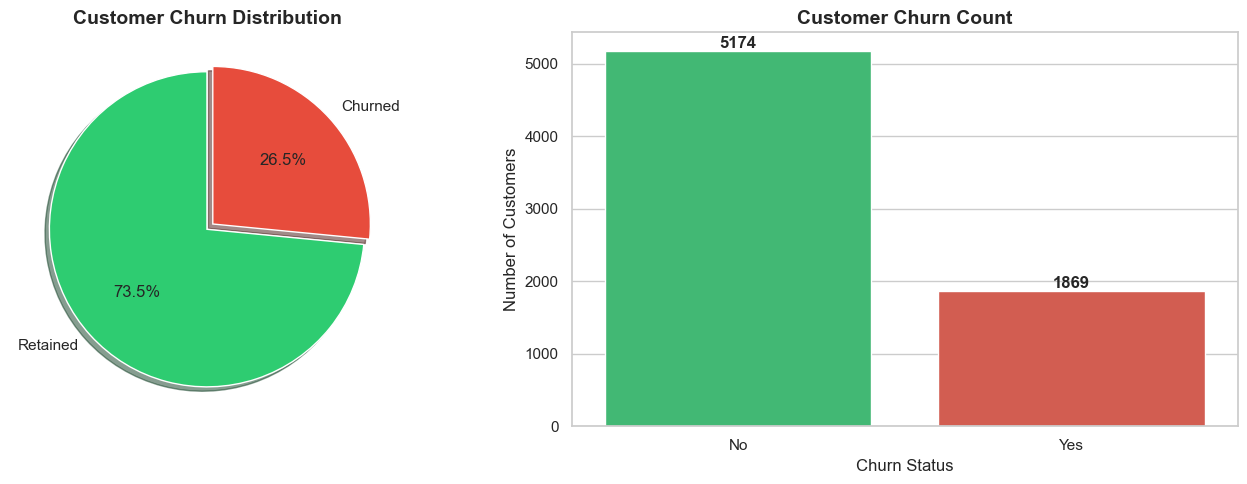

In [88]:
# Visualize the churn distribution with a pie chart and bar chart side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart showing percentage breakdown
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
axes[0].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
            colors=colors, explode=(0, 0.05), shadow=True, startangle=90)
axes[0].set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')

# Bar chart showing counts
sns.countplot(data=df, x='Churn', palette={'No': '#2ecc71', 'Yes': '#e74c3c'}, ax=axes[1])
axes[1].set_title('Customer Churn Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Number of Customers')

# Add count labels on the bars
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**Observation:** The dataset shows an imbalanced class distribution with approximately 73.5% of customers retained and 26.5% churned. This imbalance is important to consider for any predictive modeling.


## 4. Numerical Feature Distributions

Analyze the distribution of numerical features and their relationship with churn.


In [89]:
# Identify numerical columns for analysis
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Display statistics for numerical columns
print("Numerical Features Statistics:")
df[numerical_cols].describe()


Numerical Features Statistics:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


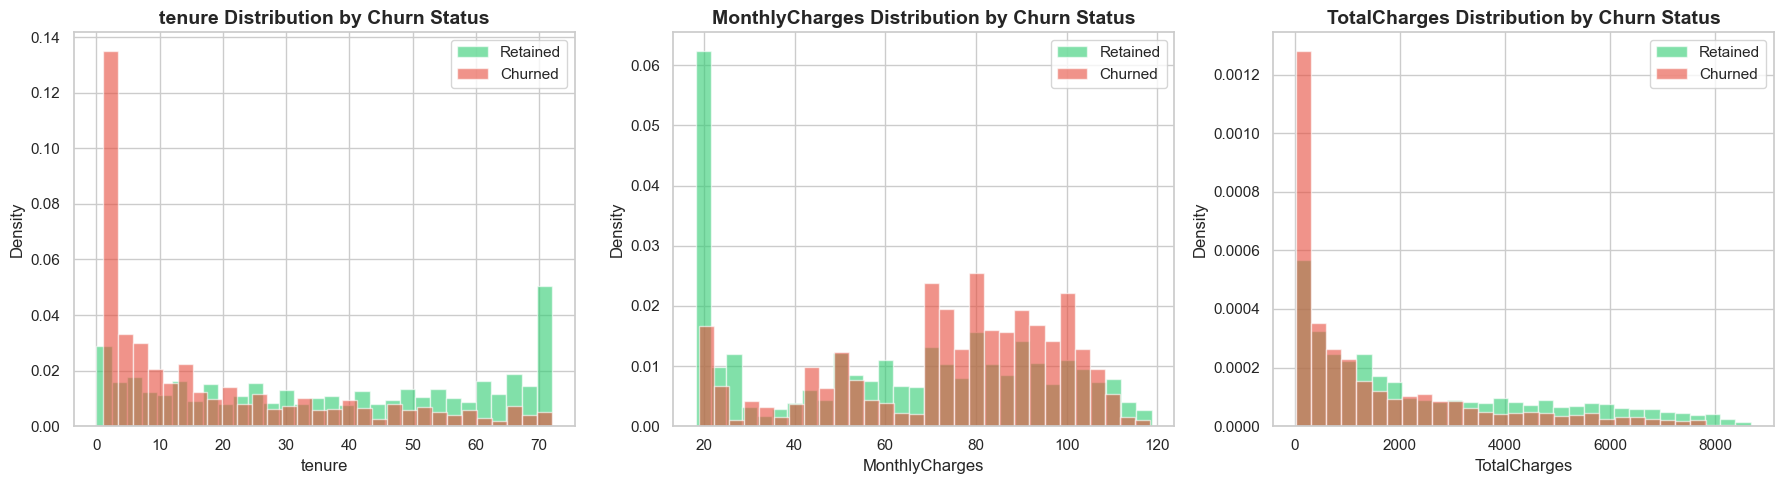

In [90]:
# Create histograms for numerical features with churn overlay
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numerical_cols):
    # Plot distribution for churned vs retained customers
    for churn_val, color, label in [('No', '#2ecc71', 'Retained'), ('Yes', '#e74c3c', 'Churned')]:
        axes[idx].hist(df[df['Churn'] == churn_val][col], bins=30, alpha=0.6, 
                       label=label, color=color, density=True)
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Density', fontsize=12)
    axes[idx].set_title(f'{col} Distribution by Churn Status', fontsize=14, fontweight='bold')
    axes[idx].legend()

plt.tight_layout()
plt.show()


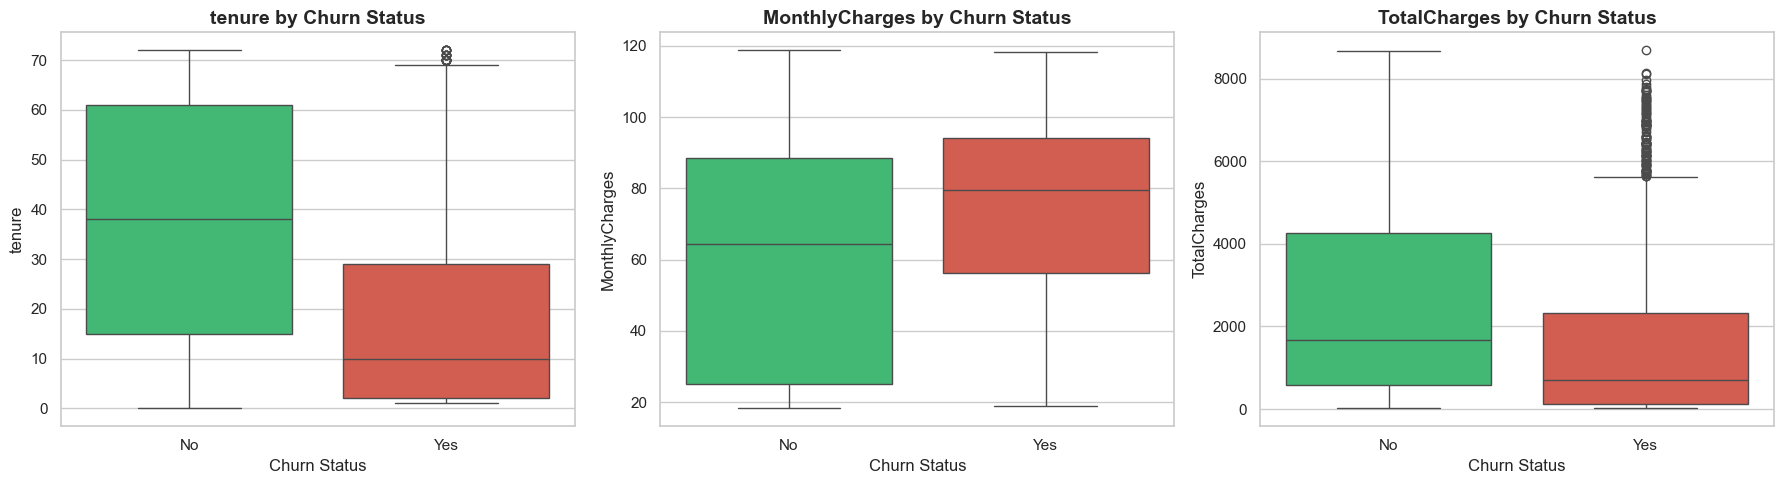

In [91]:
# Create box plots to compare distributions between churned and retained customers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Churn', y=col, palette={'No': '#2ecc71', 'Yes': '#e74c3c'}, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Churn Status', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()


In [92]:
# Calculate mean values for numerical features by churn status
print("Mean Values by Churn Status:")
print(df.groupby('Churn')[numerical_cols].mean().round(2))


Mean Values by Churn Status:
       tenure  MonthlyCharges  TotalCharges
Churn                                      
No      37.57           61.27        2550.0
Yes     17.98           74.44        1531.8


**Observations:**
- **Tenure:** Customers who churn have significantly lower tenure (average ~18 months) compared to retained customers (average ~37 months). New customers are much more likely to churn.
- **Monthly Charges:** Churned customers have higher monthly charges on average (~75 vs ~61). Higher-paying customers may feel less satisfied with value.
- **Total Charges:** Retained customers have higher total charges due to their longer tenure.


## 5. Categorical Feature Analysis

Analyze how categorical features relate to customer churn.


In [93]:
# Define categorical columns for analysis
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Display unique values for each categorical column
print("Unique values per categorical column:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unique values per categorical column:
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [94]:
# Calculate churn rate for each category of each categorical feature
def calculate_churn_rate(df, column):
    """Calculate churn rate for each category in a column"""
    return df.groupby(column)['Churn_Binary'].mean() * 100

# Display churn rates for key demographic features
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
print("Churn Rate by Demographics:\n")
for col in demographic_cols:
    print(f"{col}:")
    print(calculate_churn_rate(df, col).round(1))
    print()


Churn Rate by Demographics:

gender:
gender
Female    26.9
Male      26.2
Name: Churn_Binary, dtype: float64

SeniorCitizen:
SeniorCitizen
0    23.6
1    41.7
Name: Churn_Binary, dtype: float64

Partner:
Partner
No     33.0
Yes    19.7
Name: Churn_Binary, dtype: float64

Dependents:
Dependents
No     31.3
Yes    15.5
Name: Churn_Binary, dtype: float64



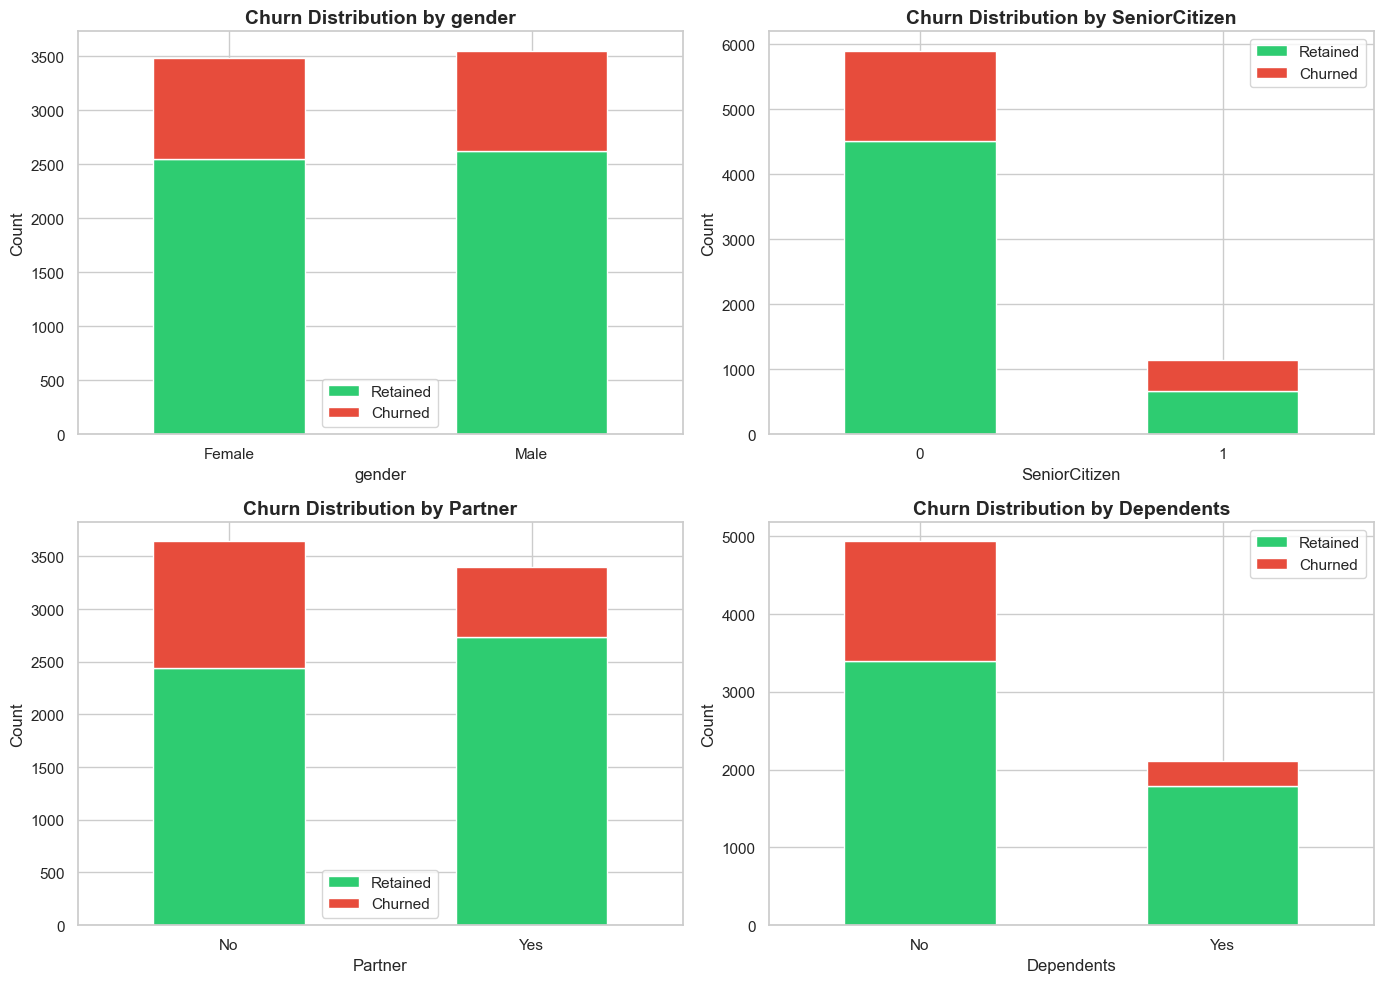

In [95]:
# Visualize churn rate by demographic features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(demographic_cols):
    # Calculate churn counts for the column
    churn_by_cat = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    
    # Plot stacked bar chart
    churn_by_cat.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], ax=axes[idx])
    axes[idx].set_title(f'Churn Distribution by {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Count', fontsize=12)
    axes[idx].legend(['Retained', 'Churned'])
    axes[idx].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**Observations:**
- **Gender:** Gender has minimal impact on churn rate - both male and female customers churn at similar rates.
- **Senior Citizen:** Senior citizens have a significantly higher churn rate `~42%` compared to non-seniors `~24%`.
- **Partner:** Customers without a partner have higher churn rates `~33%` compared to those with partners `~20%`.
- **Dependents:** Customers without dependents churn more `~31%` than those with dependents `~15%`.


In [96]:
# Analyze churn by service-related features
service_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

print("Churn Rate by Internet and Additional Services:\n")
for col in service_cols:
    print(f"{col}:")
    print(calculate_churn_rate(df, col).round(1))
    print()


Churn Rate by Internet and Additional Services:

InternetService:
InternetService
DSL            19.0
Fiber optic    41.9
No              7.4
Name: Churn_Binary, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     41.8
No internet service     7.4
Yes                    14.6
Name: Churn_Binary, dtype: float64

OnlineBackup:
OnlineBackup
No                     39.9
No internet service     7.4
Yes                    21.5
Name: Churn_Binary, dtype: float64

DeviceProtection:
DeviceProtection
No                     39.1
No internet service     7.4
Yes                    22.5
Name: Churn_Binary, dtype: float64

TechSupport:
TechSupport
No                     41.6
No internet service     7.4
Yes                    15.2
Name: Churn_Binary, dtype: float64

StreamingTV:
StreamingTV
No                     33.5
No internet service     7.4
Yes                    30.1
Name: Churn_Binary, dtype: float64

StreamingMovies:
StreamingMovies
No                     33.7
No internet servic

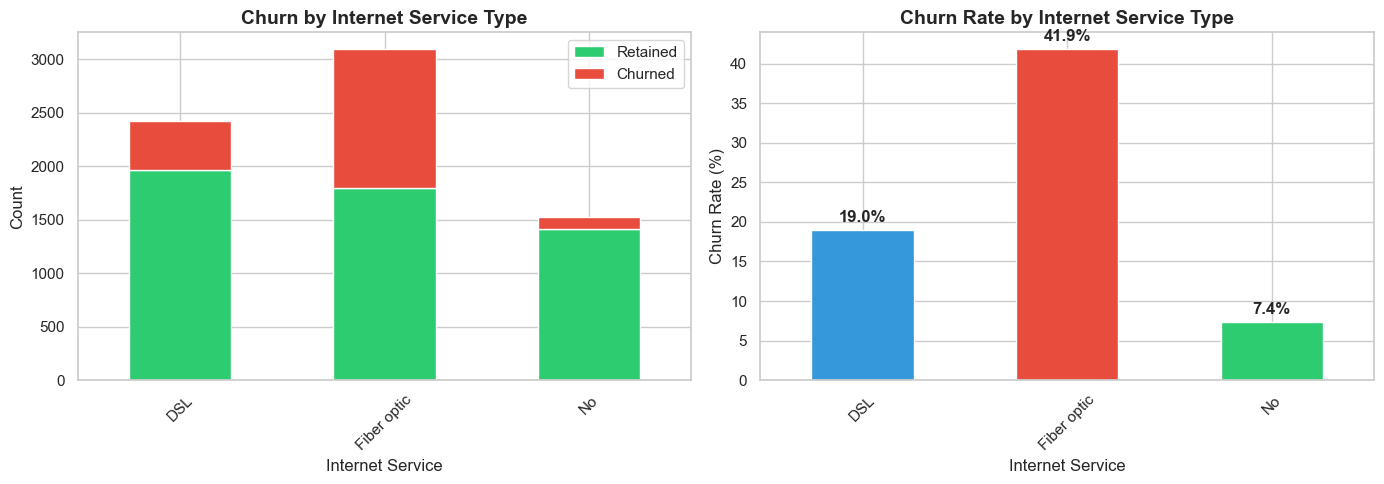

In [97]:
# Visualize churn rate by Internet Service type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Internet Service distribution with churn
churn_by_internet = df.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)
churn_by_internet.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Churn by Internet Service Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Internet Service', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(['Retained', 'Churned'])
axes[0].tick_params(axis='x', rotation=45)

# Churn rate by Internet Service
churn_rate_internet = calculate_churn_rate(df, 'InternetService')
churn_rate_internet.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71'], ax=axes[1])
axes[1].set_title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Internet Service', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Add percentage labels
for i, v in enumerate(churn_rate_internet):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


**Observation:** Fiber optic customers have a dramatically higher churn rate `~42%` compared to DSL `~19%` and no internet service `~7%`. This suggests potential issues with fiber optic service quality or pricing.


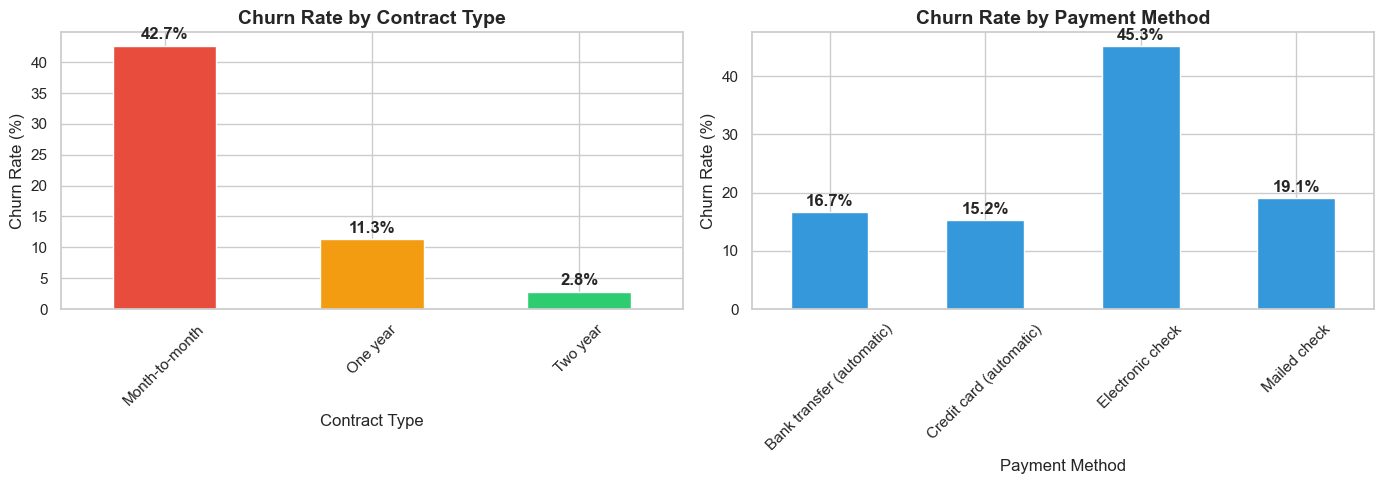

In [98]:
# Visualize churn by Contract Type and Payment Method
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Contract Type
churn_rate_contract = calculate_churn_rate(df, 'Contract')
order = ['Month-to-month', 'One year', 'Two year']
churn_rate_contract = churn_rate_contract.reindex(order)
colors = ['#e74c3c', '#f39c12', '#2ecc71']
churn_rate_contract.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Contract Type', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(churn_rate_contract):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Payment Method
churn_rate_payment = calculate_churn_rate(df, 'PaymentMethod')
churn_rate_payment.plot(kind='bar', color='#3498db', ax=axes[1])
axes[1].set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Payment Method', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(churn_rate_payment):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


**Observations:**
- **Contract Type:** Month-to-month contracts have an extremely high churn rate `~43%` compared to one-year `~11%` and two-year `~3%` contracts. Contract commitment is a strong indicator of retention.
- **Payment Method:** Electronic check customers have the highest churn rate `~45%`, while automatic payment methods (bank transfer, credit card) have much lower rates `~15-18%`. Manual payment methods may indicate less committed customers.


In [99]:
# Analyze the impact of additional services on churn for internet customers
internet_customers = df[df['InternetService'] != 'No'].copy()

add_on_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Calculate churn rates for customers with/without each add-on service
service_impact = {}
for service in add_on_services:
    with_service = internet_customers[internet_customers[service] == 'Yes']['Churn_Binary'].mean() * 100
    without_service = internet_customers[internet_customers[service] == 'No']['Churn_Binary'].mean() * 100
    service_impact[service] = {'With Service': with_service, 'Without Service': without_service}

service_impact_df = pd.DataFrame(service_impact).T
print("Churn Rate Impact of Add-on Services (Internet Customers Only):")
print(service_impact_df.round(1))


Churn Rate Impact of Add-on Services (Internet Customers Only):
                  With Service  Without Service
OnlineSecurity            14.6             41.8
OnlineBackup              21.5             39.9
DeviceProtection          22.5             39.1
TechSupport               15.2             41.6


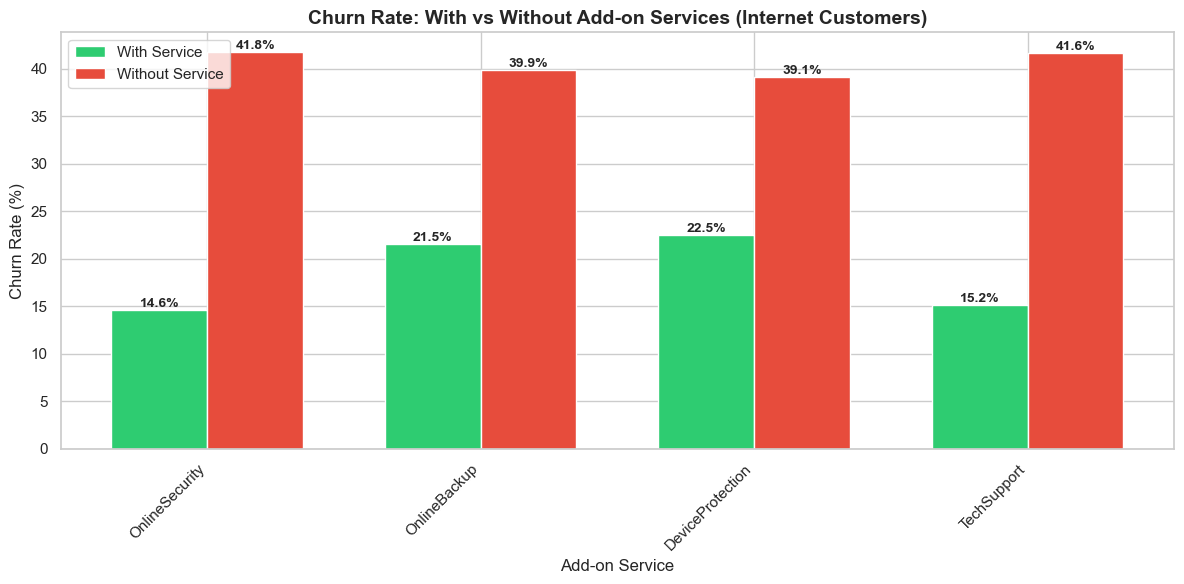

In [100]:
# Visualize the impact of add-on services
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(add_on_services))
width = 0.35

bars1 = ax.bar(x - width/2, service_impact_df['With Service'], width, label='With Service', color='#2ecc71')
bars2 = ax.bar(x + width/2, service_impact_df['Without Service'], width, label='Without Service', color='#e74c3c')

ax.set_xlabel('Add-on Service', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Churn Rate: With vs Without Add-on Services (Internet Customers)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(add_on_services, rotation=45, ha='right')
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


**Observation:** Customers with add-on services (Online Security, Online Backup, Device Protection, Tech Support) have significantly lower churn rates compared to those without. These services appear to increase customer stickiness and satisfaction.


## 6. Tenure Analysis

Deep dive into customer tenure patterns and their relationship with churn.


In [101]:
# Create tenure groups for easier analysis
def tenure_group(tenure):
    """Categorize tenure into groups"""
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 48:
        return '25-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '61+ months'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

# Set the order for tenure groups
tenure_order = ['0-12 months', '13-24 months', '25-48 months', '49-60 months', '61+ months']

# Calculate churn rate by tenure group
tenure_churn = df.groupby('TenureGroup')['Churn_Binary'].agg(['sum', 'count', 'mean'])
tenure_churn.columns = ['Churned', 'Total', 'Churn_Rate']
tenure_churn['Churn_Rate'] = tenure_churn['Churn_Rate'] * 100
tenure_churn = tenure_churn.reindex(tenure_order)

print("Churn Statistics by Tenure Group:")
print(tenure_churn.round(1))


Churn Statistics by Tenure Group:
              Churned  Total  Churn_Rate
TenureGroup                             
0-12 months      1037   2186        47.4
13-24 months      294   1024        28.7
25-48 months      325   1594        20.4
49-60 months      120    832        14.4
61+ months         93   1407         6.6


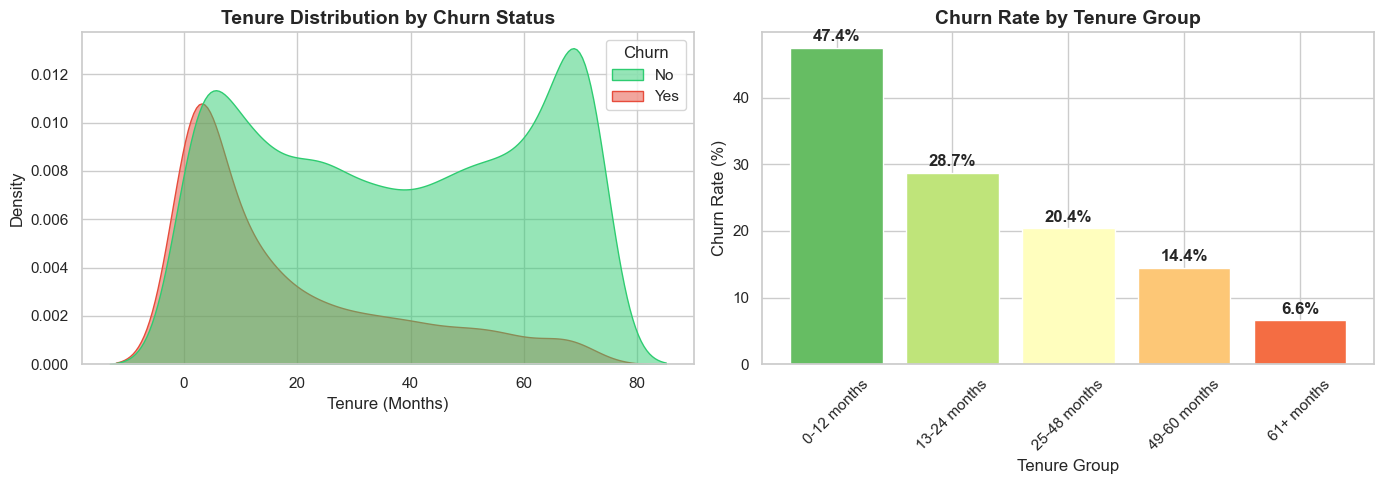

In [102]:
# Visualize tenure distribution and churn rate
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tenure distribution by churn status
sns.kdeplot(data=df, x='tenure', hue='Churn', palette={'No': '#2ecc71', 'Yes': '#e74c3c'}, 
            fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure (Months)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Churn rate by tenure group
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(tenure_order)))
churn_rate_by_tenure = df.groupby('TenureGroup')['Churn_Binary'].mean().reindex(tenure_order) * 100
bars = axes[1].bar(tenure_order, churn_rate_by_tenure, color=colors)
axes[1].set_title('Churn Rate by Tenure Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tenure Group', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Add value labels
for bar, val in zip(bars, churn_rate_by_tenure):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


**Observation:** The first year is critical - customers in the 0-12 month tenure group have the highest churn rate (~48%). Churn rate decreases dramatically as tenure increases, with long-term customers (61+ months) having only ~7% churn rate. Early engagement and retention strategies are crucial.


## 7. Correlation Analysis

Examine correlations between numerical features and identify patterns.


In [103]:
# Create a numeric dataframe for correlation analysis
# Convert binary categorical variables to numeric
df_numeric = df.copy()

# Map Yes/No columns to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_numeric[col] = df_numeric[col].map({'Yes': 1, 'No': 0})

# Map gender
df_numeric['gender'] = df_numeric['gender'].map({'Male': 1, 'Female': 0})

# Select numeric columns for correlation
correlation_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                    'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary']

# Calculate correlation matrix
corr_matrix = df_numeric[correlation_cols].corr()

print("Correlation Matrix:")
corr_matrix.round(2)


Correlation Matrix:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_Binary
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.01,-0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.16,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,-0.01,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.11,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.01,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,0.02,0.25,0.11,0.01
PaperlessBilling,-0.01,0.16,-0.01,-0.11,0.01,0.02,1.00,0.35,0.16,0.19
MonthlyCharges,-0.01,0.22,0.10,-0.11,0.25,0.25,0.35,1.00,0.65,0.19
TotalCharges,-0.00,0.10,0.32,0.06,0.83,0.11,0.16,0.65,1.00,-0.20
Churn_Binary,-0.01,0.15,-0.15,-0.16,-0.35,0.01,0.19,0.19,-0.20,1.00


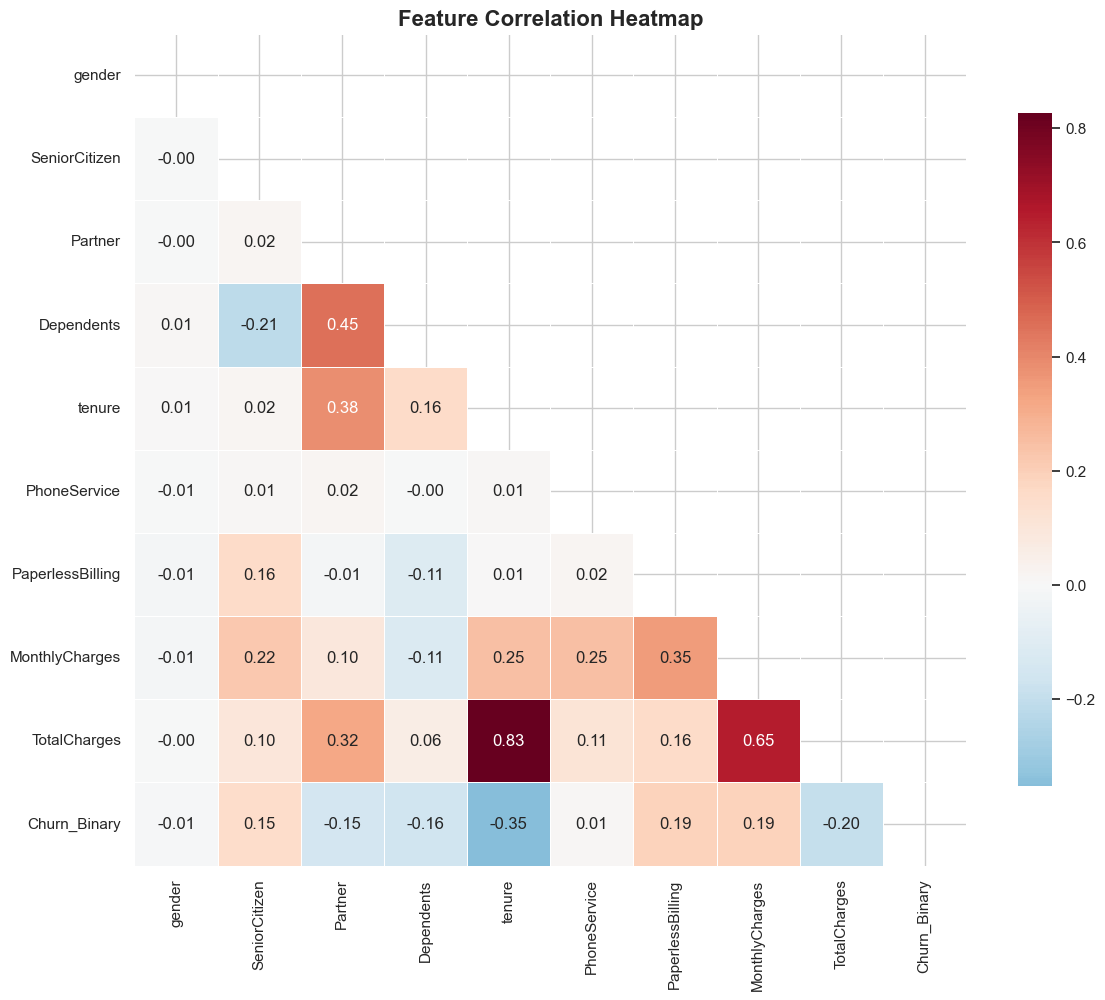

In [104]:
# Create a correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, mask=mask, ax=ax,
            cbar_kws={'shrink': 0.8})

ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [105]:
# Show correlations with Churn specifically, sorted by strength
churn_correlations = corr_matrix['Churn_Binary'].drop('Churn_Binary').sort_values(key=abs, ascending=False)

print("Features Correlated with Churn (sorted by absolute correlation):")
print(churn_correlations.round(3))


Features Correlated with Churn (sorted by absolute correlation):
tenure             -0.352
TotalCharges       -0.198
MonthlyCharges      0.193
PaperlessBilling    0.192
Dependents         -0.164
SeniorCitizen       0.151
Partner            -0.150
PhoneService        0.012
gender             -0.009
Name: Churn_Binary, dtype: float64


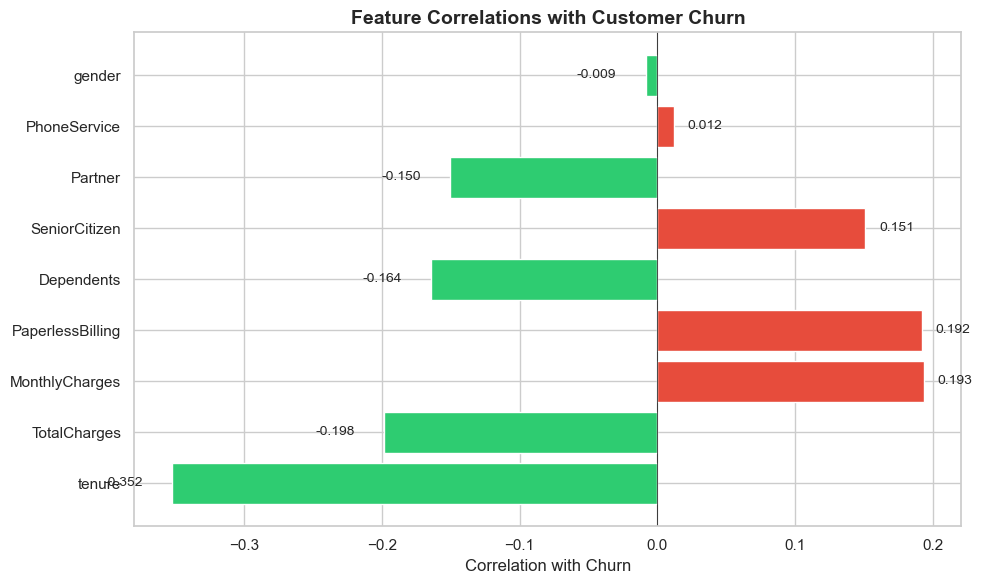

In [106]:
# Visualize correlations with churn
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in churn_correlations]
bars = ax.barh(churn_correlations.index, churn_correlations.values, color=colors)

ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlabel('Correlation with Churn', fontsize=12)
ax.set_title('Feature Correlations with Customer Churn', fontsize=14, fontweight='bold')

# Add value labels
for bar, val in zip(bars, churn_correlations):
    x_pos = val + 0.01 if val > 0 else val - 0.05
    ax.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
            va='center', fontsize=10)

plt.tight_layout()
plt.show()


**Key Correlations with Churn:**
- **Negative correlations (reduce churn):** tenure (-0.35), TotalCharges (-0.20), Partner (-0.15), Dependents (-0.16)
- **Positive correlations (increase churn):** MonthlyCharges (0.19), SeniorCitizen (0.15), PaperlessBilling (0.19)

**Other Notable Correlations:**
- tenure and TotalCharges are strongly correlated (0.83) - expected since longer tenure means more cumulative charges
- Partner and Dependents are correlated (0.45) - customers with partners often have dependents


## 8. Multi-Feature Analysis

Examine interactions between multiple features and their combined effect on churn.


In [107]:
# Analyze churn by Contract and Internet Service combination
pivot_contract_internet = df.pivot_table(values='Churn_Binary', 
                                          index='Contract', 
                                          columns='InternetService', 
                                          aggfunc='mean') * 100

print("Churn Rate (%) by Contract Type and Internet Service:")
pivot_contract_internet.round(1)


Churn Rate (%) by Contract Type and Internet Service:


InternetService,DSL,Fiber optic,No
Contract,,,
Month-to-month,32.2,54.6,18.9
One year,9.3,19.3,2.5
Two year,1.9,7.2,0.8


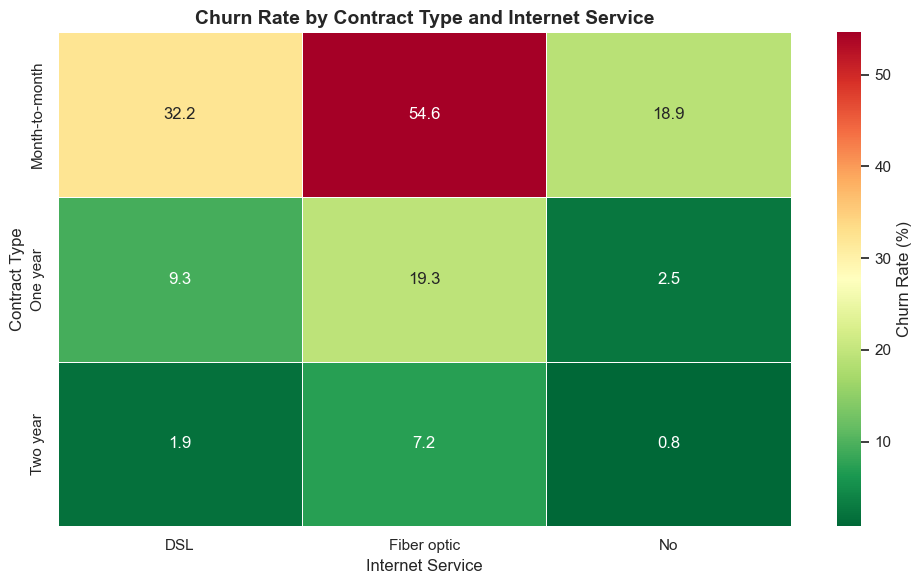

In [108]:
# Heatmap of Contract x Internet Service churn rates
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(pivot_contract_internet, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            linewidths=0.5, ax=ax, cbar_kws={'label': 'Churn Rate (%)'})
ax.set_title('Churn Rate by Contract Type and Internet Service', fontsize=14, fontweight='bold')
ax.set_xlabel('Internet Service', fontsize=12)
ax.set_ylabel('Contract Type', fontsize=12)

plt.tight_layout()
plt.show()


**Observation:** The combination of Month-to-month contract with Fiber optic internet has the highest churn rate `~52%`, while Two-year contract with No internet has the lowest `~2%`. This highlights the importance of both contract length and service type in retention.


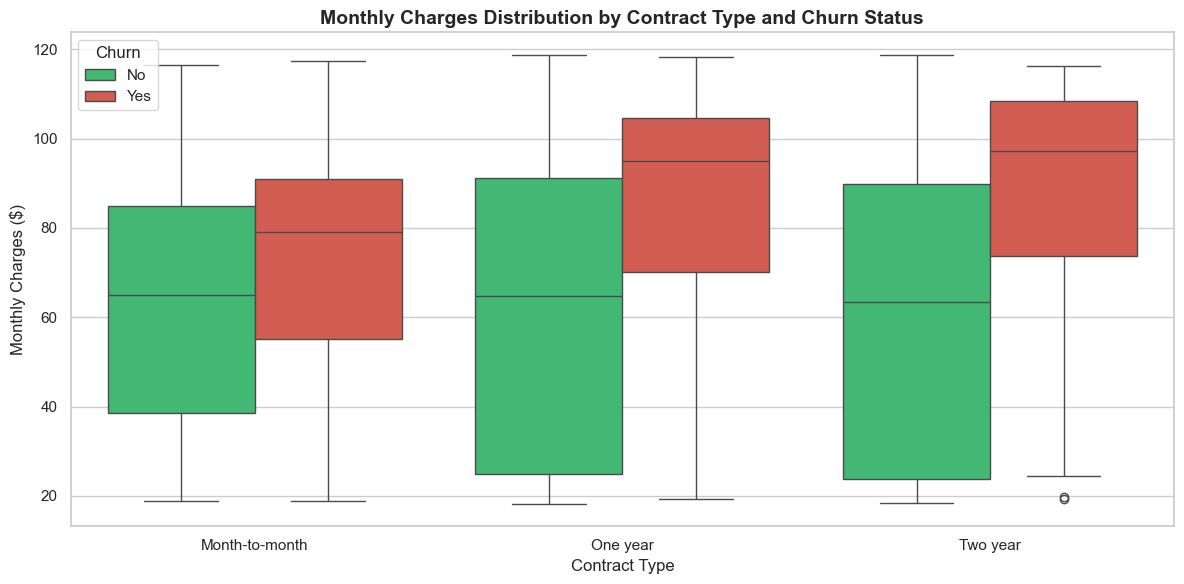

In [109]:
# Analyze monthly charges distribution by contract type and churn
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn',
            palette={'No': '#2ecc71', 'Yes': '#e74c3c'},
            order=['Month-to-month', 'One year', 'Two year'], ax=ax)

ax.set_title('Monthly Charges Distribution by Contract Type and Churn Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Contract Type', fontsize=12)
ax.set_ylabel('Monthly Charges ($)', fontsize=12)

plt.tight_layout()
plt.show()


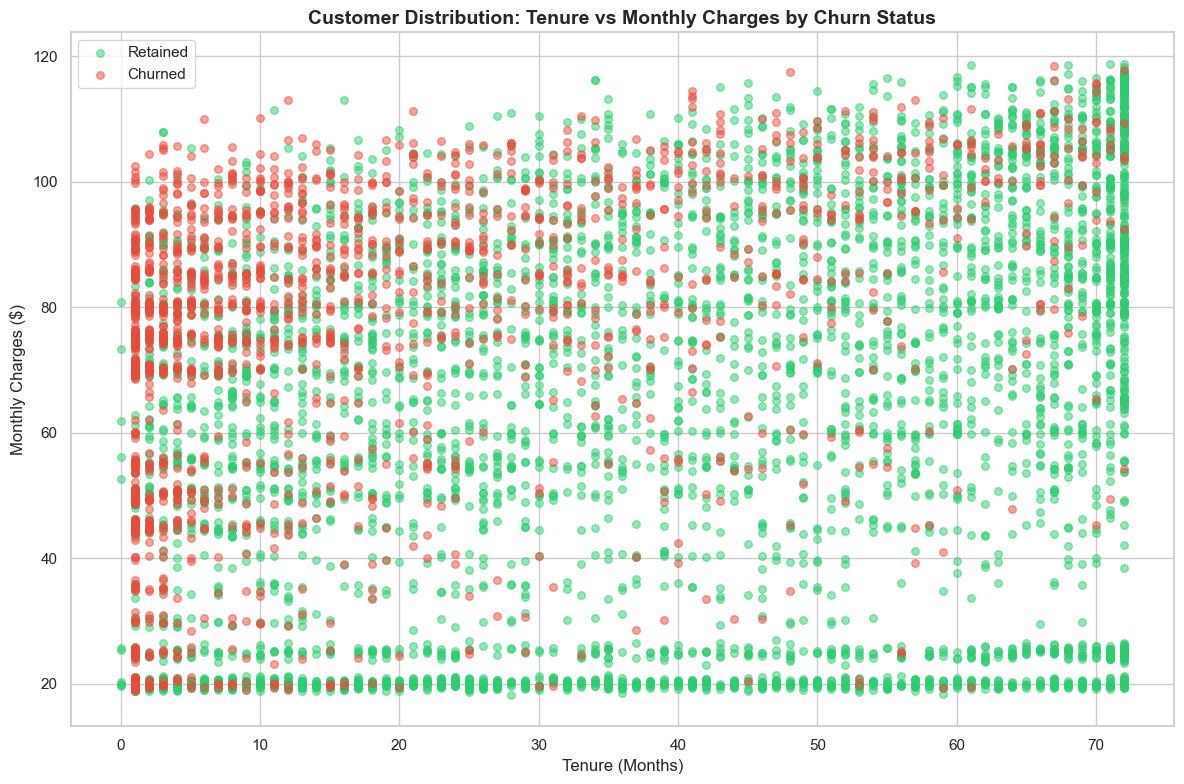

In [110]:
# Scatter plot: Tenure vs Monthly Charges colored by Churn
fig, ax = plt.subplots(figsize=(12, 8))

# Plot churned customers
churned = df[df['Churn'] == 'Yes']
retained = df[df['Churn'] == 'No']

ax.scatter(retained['tenure'], retained['MonthlyCharges'], c='#2ecc71', 
           alpha=0.5, label='Retained', s=30)
ax.scatter(churned['tenure'], churned['MonthlyCharges'], c='#e74c3c', 
           alpha=0.5, label='Churned', s=30)

ax.set_xlabel('Tenure (Months)', fontsize=12)
ax.set_ylabel('Monthly Charges ($)', fontsize=12)
ax.set_title('Customer Distribution: Tenure vs Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()


**Observation:** Churned customers (red) tend to cluster in the low tenure, high monthly charges region. This indicates that new customers paying higher prices are at the greatest risk of leaving.


## 9. High-Risk Customer Profile


In [111]:
# Define high-risk criteria based on our analysis
high_risk = df[
    (df['Contract'] == 'Month-to-month') & 
    (df['tenure'] <= 12) & 
    (df['InternetService'] == 'Fiber optic')
]

high_risk_churn_rate = high_risk['Churn_Binary'].mean() * 100
overall_churn_rate = df['Churn_Binary'].mean() * 100

print("High-Risk Customer Profile:")
print("- Contract: Month-to-month")
print("- Tenure: 12 months or less")
print("- Internet Service: Fiber optic")
print(f"\nNumber of high-risk customers: {len(high_risk)} ({100*len(high_risk)/len(df):.1f}% of total)")
print(f"High-risk customer churn rate: {high_risk_churn_rate:.1f}%")
print(f"Overall churn rate: {overall_churn_rate:.1f}%")
print(f"\nHigh-risk customers are {high_risk_churn_rate/overall_churn_rate:.1f}x more likely to churn than average")


High-Risk Customer Profile:
- Contract: Month-to-month
- Tenure: 12 months or less
- Internet Service: Fiber optic

Number of high-risk customers: 916 (13.0% of total)
High-risk customer churn rate: 70.2%
Overall churn rate: 26.5%

High-risk customers are 2.6x more likely to churn than average


In [112]:
# Additional high-risk factor: Electronic check payment
high_risk_with_payment = df[
    (df['Contract'] == 'Month-to-month') & 
    (df['tenure'] <= 12) & 
    (df['InternetService'] == 'Fiber optic') &
    (df['PaymentMethod'] == 'Electronic check')
]

ultra_high_risk_churn = high_risk_with_payment['Churn_Binary'].mean() * 100

print("Ultra High-Risk Customer Profile (including Electronic check payment):")
print(f"Number of customers: {len(high_risk_with_payment)} ({100*len(high_risk_with_payment)/len(df):.1f}% of total)")
print(f"Churn rate: {ultra_high_risk_churn:.1f}%")
print(f"\nThese customers are {ultra_high_risk_churn/overall_churn_rate:.1f}x more likely to churn than average")


Ultra High-Risk Customer Profile (including Electronic check payment):
Number of customers: 631 (9.0% of total)
Churn rate: 71.2%

These customers are 2.7x more likely to churn than average


## 10. Summary and Key Findings

### Overall Churn Statistics
- **Total Customers:** 7,043
- **Churned Customers:** 1,869 (26.5%)
- **Retained Customers:** 5,174 (73.5%)

### Key Factors Influencing Churn

**1. Contract Type (Strongest Factor)**
- Month-to-month: ~43% churn rate
- One year: ~11% churn rate
- Two year: ~3% churn rate

**2. Tenure**
- New customers (0-12 months): ~48% churn rate
- Long-term customers (61+ months): ~7% churn rate
- The first year is critical for customer retention

**3. Internet Service Type**
- Fiber optic: ~42% churn rate (highest)
- DSL: ~19% churn rate
- No internet: ~7% churn rate

**4. Payment Method**
- Electronic check: ~45% churn rate
- Automatic payments: ~15-18% churn rate

**5. Add-on Services**
- Customers with Online Security, Tech Support, etc. have significantly lower churn rates
- These services increase customer stickiness

**6. Demographics**
- Senior citizens have higher churn (~42% vs ~24%)
- Customers without partners or dependents churn more

### High-Risk Customer Profile
- Month-to-month contract
- Tenure ≤ 12 months
- Fiber optic internet
- Electronic check payment
- No add-on services

### Recommendations for Retention
1. **Focus on new customers:** Implement strong onboarding and engagement programs in the first year
2. **Encourage contract commitments:** Offer incentives for longer-term contracts
3. **Investigate fiber optic service:** High churn suggests potential quality or pricing issues
4. **Promote automatic payments:** Customers with auto-pay are more likely to stay
5. **Bundle add-on services:** Cross-sell security and support services to increase stickiness
6. **Target senior citizens:** Develop retention programs specifically for this demographic
